# **Warehouse Operational Efficiency Analysis**
---
Focus: Process performance, workforce productivity, and cost optimization

>### Importing Liabraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

>### Connecting With **PostgreSQL** Data-Base

In [20]:
from sqlalchemy import create_engine

"""Connection Details"""

user = "postgres"  # username
password = "tictok#2020"  # password
host = "localhost"  # server IP
port = "5432"  # port no
database = "warehouse_db"  # Data-Base name

try:
    engine = create_engine(
        f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"
    )
    with engine.connect() as connection:
        print("Successfully connected to PostgreSQL Data-Base")

except Exception as exc:
    print("Error while connecting to PostgreSQL", exc)

Successfully connected to PostgreSQL Data-Base


>### Operational Efficiency Analysis

#### Q1: Which zones or shifts experience the highest order processing delays?

In [ ]:
# Running SQL query inside python notebook using Pandas
query_q1 = """
WITH
    order_processing_delays AS (
        SELECT
            orders.order_zone,
            employees.shift,
            ROUND(AVG(orders.process_time_min), 2) AS avg_processing_time,
            COUNT(orders.order_id) AS order_count
        FROM
            orders
            JOIN employees ON (orders.picker_id = employees.picker_id)
        GROUP BY
            orders.order_zone,
            employees.shift
    )
SELECT
    order_zone AS "Zone",
    shift AS "Shift",
    avg_processing_time AS "Average Processing Time",
    order_count AS "Total Orders"
FROM
    order_processing_delays
ORDER BY
    avg_processing_time DESC;
"""

df_order = pd.read_sql(sql=query_q1, con=engine)
df_order

,Zone,Shift,Average Processing Time,Total Orders
0,C,Morning,66.08,908
1,A,Night,65.82,654
2,D,Evening,65.82,975
3,B,Evening,65.08,1067
4,A,Morning,64.73,814
5,A,Evening,64.56,1033
6,C,Night,63.95,576
7,C,Evening,63.80,984
8,B,Night,63.74,606
9,B,Morning,63.63,871


##### Using Bar Plot for visualization

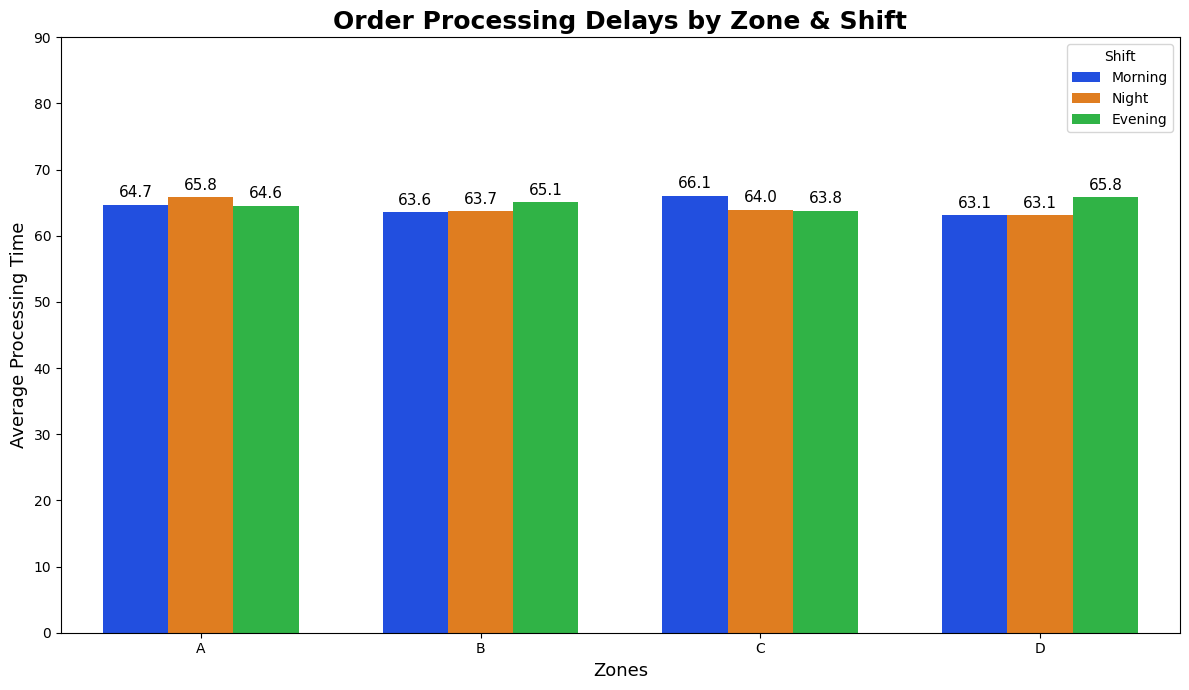

In [65]:
plt.figure(figsize=(12, 7)) # figure dimension
ax = sns.barplot(
    data=df_order,
    x="Zone",
    y="Average Processing Time",
    hue="Shift",
    order=df_order["Zone"].sort_values(),
    palette="bright",
    width=0.7,
)
plt.title("Order Processing Delays by Zone & Shift", fontsize=18, weight="bold")
plt.xlabel("Zones", fontsize=13)
plt.ylabel("Average Processing Time", fontsize=13)
plt.ylim(top=90)

# --- ADD BAR LABELS ---
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.1f",  # format: one decimal
        label_type="edge",  # label at edge (top)
        padding=3,  # space above bar
        fontsize=11,
        color="black",
    )
plt.tight_layout()
plt.show()

##### Insights:

+ The average processing time of all zones and shift are almost identical. It means that warehouses having balance workloads and uniform staffing.
+ Zone C with morning shift having higest average processing time.
+ It reveals that performence level largely consistent accross all the warehouses.